# Naive Bayes

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [71]:
dataset = pd.read_csv('Immunotherapy.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [61]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1])

In [72]:
X

array([[ 2.25, 14.  ],
       [ 3.  ,  2.  ],
       [10.5 ,  2.  ],
       [ 4.5 ,  9.  ],
       [ 8.  ,  6.  ],
       [ 5.  ,  3.  ],
       [ 9.75,  2.  ],
       [ 7.5 ,  4.  ],
       [ 6.  ,  2.  ],
       [12.  ,  6.  ],
       [ 6.25,  2.  ],
       [ 5.75, 12.  ],
       [ 1.75,  1.  ],
       [ 5.5 , 12.  ],
       [10.  ,  7.  ],
       [ 9.25,  2.  ],
       [ 7.75,  6.  ],
       [ 7.5 , 10.  ],
       [ 6.5 , 19.  ],
       [ 6.75,  2.  ],
       [ 1.25,  3.  ],
       [ 2.25,  2.  ],
       [10.5 ,  6.  ],
       [ 5.75,  2.  ],
       [11.25,  4.  ],
       [ 5.  ,  2.  ],
       [ 4.75, 10.  ],
       [11.  ,  6.  ],
       [11.5 , 12.  ],
       [ 7.75, 18.  ],
       [ 2.5 ,  1.  ],
       [ 3.  ,  2.  ],
       [10.25,  7.  ],
       [ 4.25,  1.  ],
       [ 8.  ,  3.  ],
       [ 5.  ,  7.  ],
       [11.  , 11.  ],
       [ 8.75,  3.  ],
       [ 8.5 ,  5.  ],
       [11.25,  4.  ],
       [ 8.25,  9.  ],
       [ 8.75, 10.  ],
       [ 8.5 ,  1.  ],
       [ 4.

## Splitting the dataset into the Training set and Test set

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [74]:
X_train

array([[ 7.75,  6.  ],
       [ 1.  ,  2.  ],
       [10.  ,  8.  ],
       [ 4.  ,  1.  ],
       [11.  ,  3.  ],
       [ 8.75,  8.  ],
       [ 4.5 ,  9.  ],
       [ 8.  ,  5.  ],
       [ 9.25, 13.  ],
       [11.  ,  6.  ],
       [ 6.5 , 19.  ],
       [ 1.75, 10.  ],
       [ 2.25,  5.  ],
       [ 6.5 ,  9.  ],
       [11.25,  3.  ],
       [ 7.5 , 13.  ],
       [ 8.  ,  6.  ],
       [ 9.25,  2.  ],
       [ 7.5 , 10.  ],
       [ 8.25,  9.  ],
       [ 8.5 ,  5.  ],
       [ 5.  ,  3.  ],
       [ 2.  , 11.  ],
       [ 6.75,  4.  ],
       [ 2.25, 14.  ],
       [ 8.  ,  3.  ],
       [11.5 , 12.  ],
       [ 5.75, 12.  ],
       [ 5.  ,  7.  ],
       [ 5.75,  2.  ],
       [ 9.  ,  4.  ],
       [ 6.25,  2.  ],
       [ 3.  ,  2.  ],
       [ 3.75, 14.  ],
       [10.  ,  1.  ],
       [ 4.  ,  4.  ],
       [ 3.  ,  2.  ],
       [10.25,  7.  ],
       [11.75,  5.  ],
       [10.  ,  7.  ],
       [ 5.5 ,  8.  ],
       [ 6.75,  2.  ],
       [ 7.75, 18.  ],
       [12.

In [75]:
y_test

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1])

## Feature Scaling

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
X_train

array([[ 1.54647555e-01, -1.06329123e-01],
       [-1.96472689e+00, -1.02556154e+00],
       [ 8.61105703e-01,  3.53287085e-01],
       [-1.02278269e+00, -1.25536964e+00],
       [ 1.17508710e+00, -7.95753435e-01],
       [ 4.68628954e-01,  3.53287085e-01],
       [-8.65791993e-01,  5.83095189e-01],
       [ 2.33142905e-01, -3.36137227e-01],
       [ 6.25619654e-01,  1.50232761e+00],
       [ 1.17508710e+00, -1.06329123e-01],
       [-2.37829194e-01,  2.88117623e+00],
       [-1.72924084e+00,  8.12903294e-01],
       [-1.57225014e+00, -3.36137227e-01],
       [-2.37829194e-01,  5.83095189e-01],
       [ 1.25358245e+00, -7.95753435e-01],
       [ 7.61522050e-02,  1.50232761e+00],
       [ 2.33142905e-01, -1.06329123e-01],
       [ 6.25619654e-01, -1.02556154e+00],
       [ 7.61522050e-02,  8.12903294e-01],
       [ 3.11638254e-01,  5.83095189e-01],
       [ 3.90133604e-01, -3.36137227e-01],
       [-7.08801293e-01, -7.95753435e-01],
       [-1.65074549e+00,  1.04271140e+00],
       [-1.

## Training the Naive Bayes model on the Training set

In [78]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

## Predicting the Test set results

In [79]:
y_pred = classifier.predict(X_test)

In [82]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [83]:
y_test

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1])

## Making the Confusion Matrix

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 1  3]
 [ 1 18]]


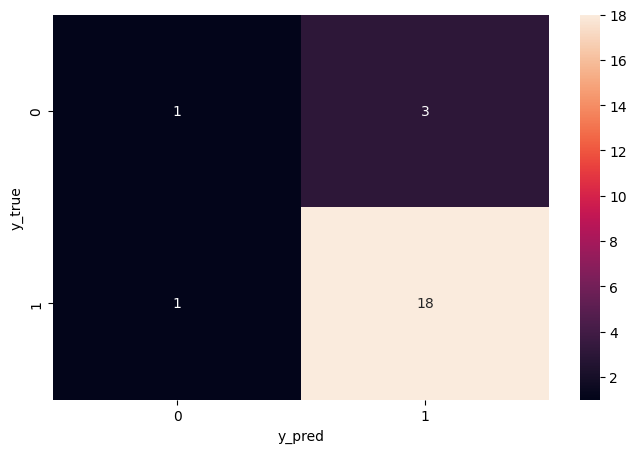

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [85]:
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.86      0.95      0.90        19

    accuracy                           0.83        23
   macro avg       0.68      0.60      0.62        23
weighted avg       0.80      0.83      0.80        23



## Visualising the Training set results

<ipython-input-87-88b241bfa95d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


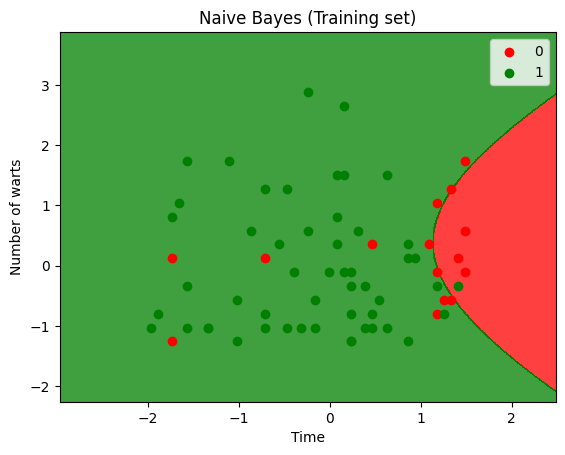

In [87]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Time')
plt.ylabel('Number of warts')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-89-160f38b547ac>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


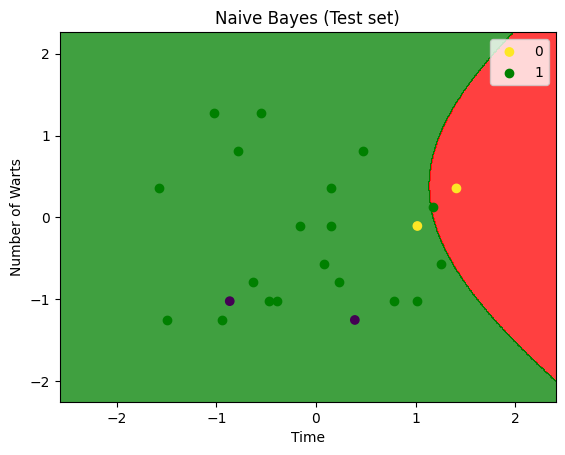

In [89]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Time')
plt.ylabel('Number of Warts')
plt.legend()
plt.show()